# ABALONE CASE STUDY

DESCRIPTION

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

                                           OR

In [3]:
df=pd.read_csv('C:/Users/user/Desktop/DT Python/drscience master thing/dataset1-master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176
Sex,M,M,F,M,I,I,F,F,M,F,...,M,F,M,M,M,F,M,M,F,M
Length,0.455,0.35,0.53,0.44,0.33,0.425,0.53,0.545,0.475,0.55,...,0.5,0.515,0.52,0.55,0.56,0.565,0.59,0.6,0.625,0.71
Diameter,0.365,0.265,0.42,0.365,0.255,0.3,0.415,0.425,0.37,0.44,...,0.38,0.4,0.385,0.43,0.43,0.45,0.44,0.475,0.485,0.555
Height,0.095,0.09,0.135,0.125,0.08,0.095,0.15,0.125,0.125,0.15,...,0.125,0.125,0.165,0.13,0.155,0.165,0.135,0.205,0.15,0.195
Whole weight,0.514,0.2255,0.677,0.516,0.205,0.3515,0.7775,0.768,0.5095,0.8945,...,0.577,0.615,0.791,0.8395,0.8675,0.887,0.966,1.176,1.0945,1.9485
Shucked weight,0.2245,0.0995,0.2565,0.2155,0.0895,0.141,0.237,0.294,0.2165,0.3145,...,0.269,0.2865,0.375,0.3155,0.4,0.37,0.439,0.5255,0.531,0.9455
Viscera weight,0.101,0.0485,0.1415,0.114,0.0395,0.0775,0.1415,0.1495,0.1125,0.151,...,0.1265,0.123,0.18,0.1955,0.172,0.239,0.2145,0.2875,0.261,0.3765
Shell weight,0.15,0.07,0.21,0.155,0.055,0.12,0.33,0.26,0.165,0.32,...,0.1535,0.1765,0.1815,0.2405,0.229,0.249,0.2605,0.308,0.296,0.495
Rings,15,7,9,10,7,8,20,16,9,19,...,9,8,10,10,8,11,10,9,10,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.shape

(4177, 9)

In [11]:
df.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

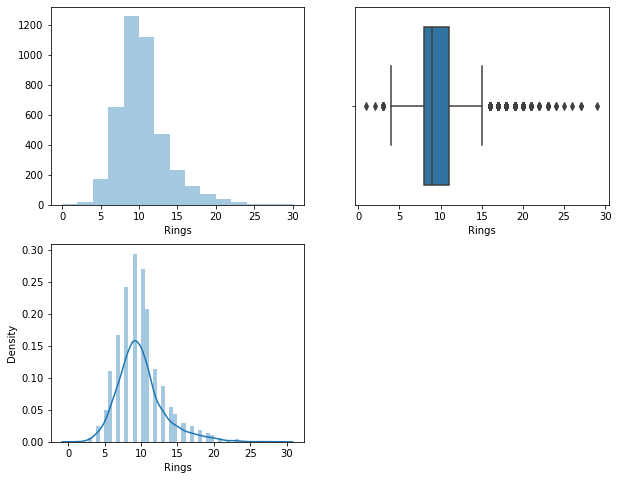

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Rings']);
plt.subplot(2,2,3)
sns.distplot(df['Rings']);

<AxesSubplot:xlabel='Rings', ylabel='Density'>

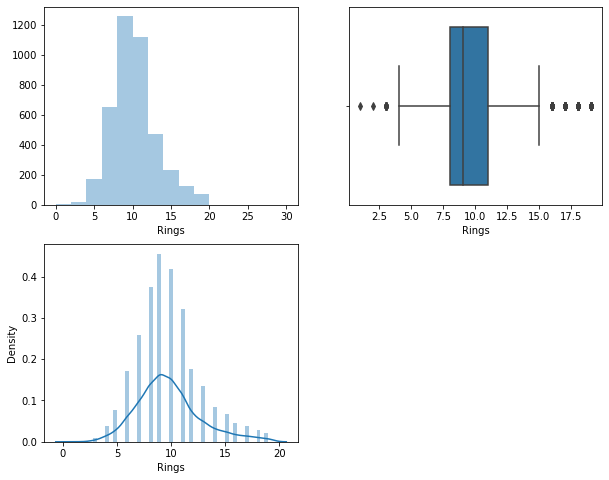

In [13]:
df  =  df[df['Rings']< 20]
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Rings']);
plt.subplot(2,2,3)
sns.distplot(df['Rings'])

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [15]:
numerical_features  =  df.select_dtypes(include=[np.number]).columns
categorical_features  =  df.select_dtypes(include=[np.object]).columns

In [16]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [17]:
categorical_features

Index(['Sex'], dtype='object')

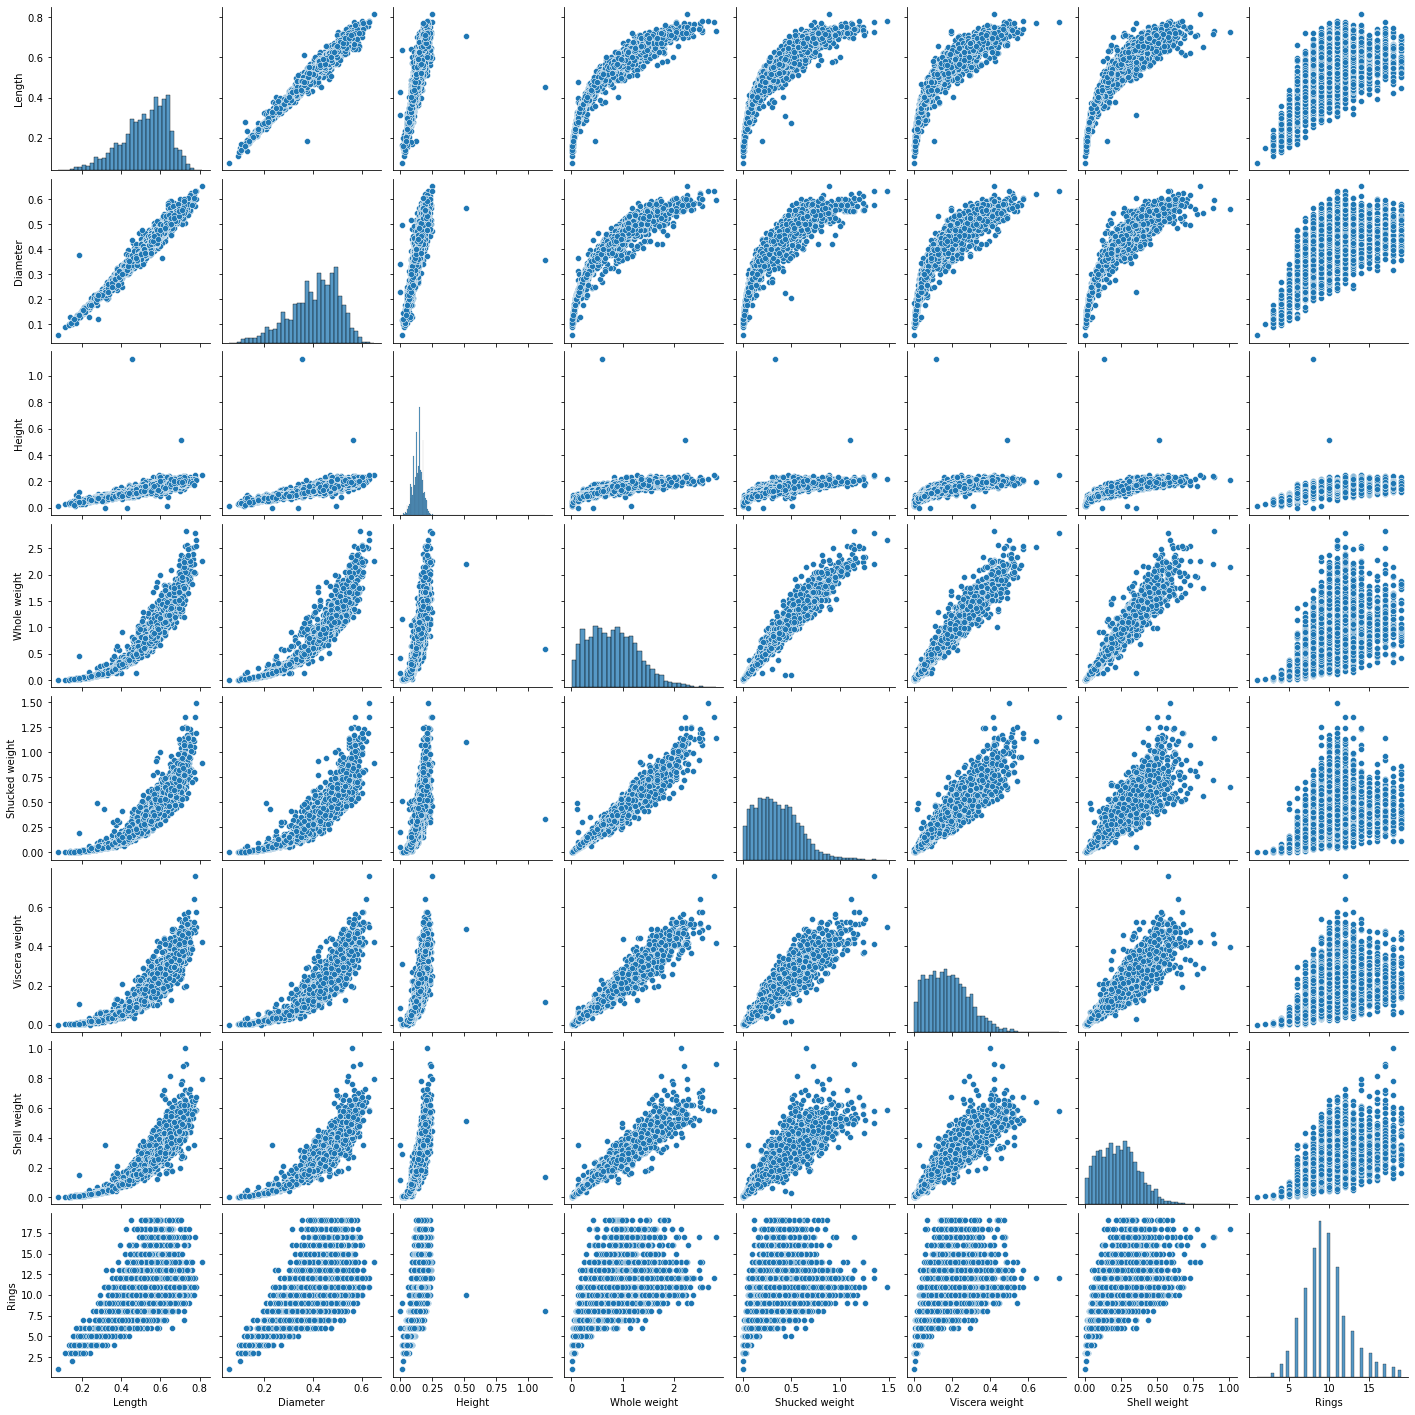

In [18]:
sns.pairplot(df[numerical_features])

<AxesSubplot:>

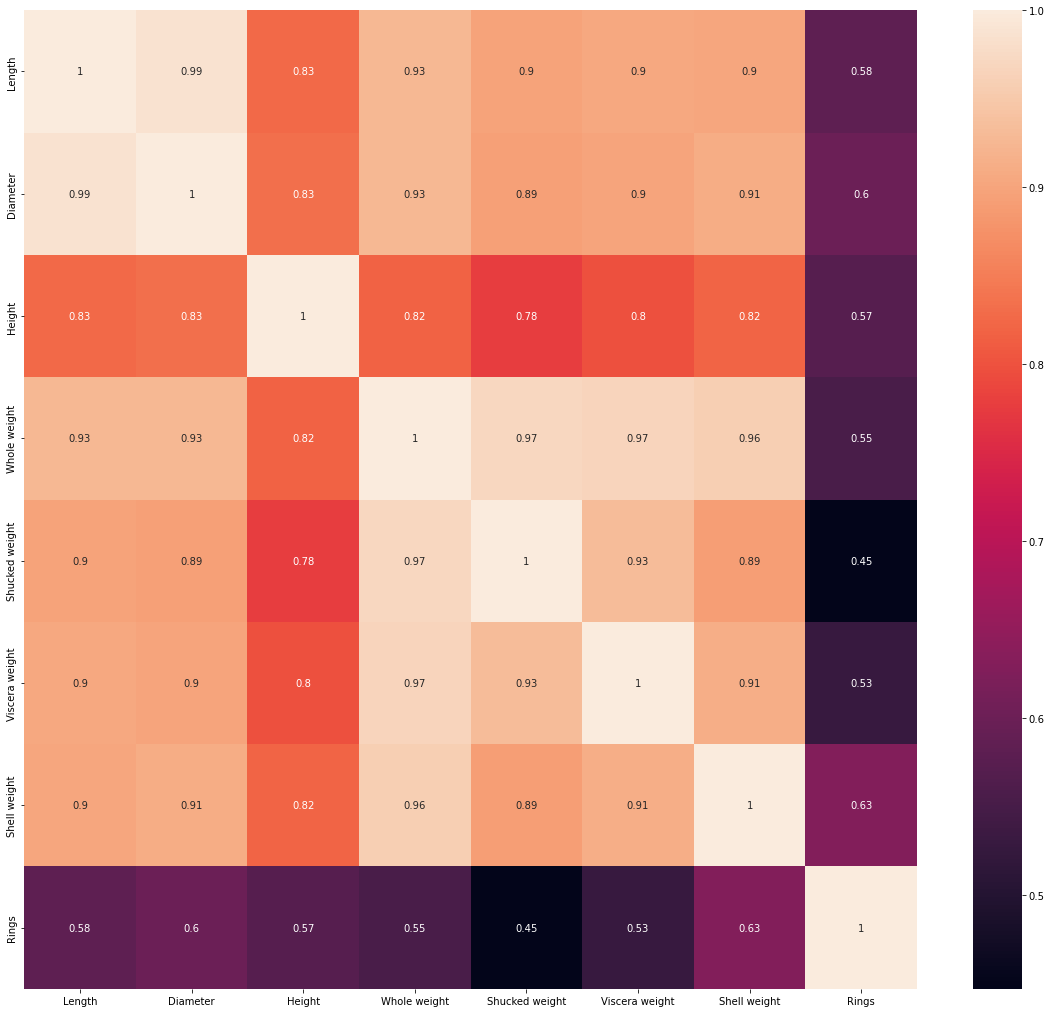

In [19]:
plt.figure(figsize=(20,18))
sns.heatmap(df[numerical_features].corr(),  annot=True)

In [20]:
df  =  pd.get_dummies(df)
dummy_df  =  df.copy()

<AxesSubplot:>

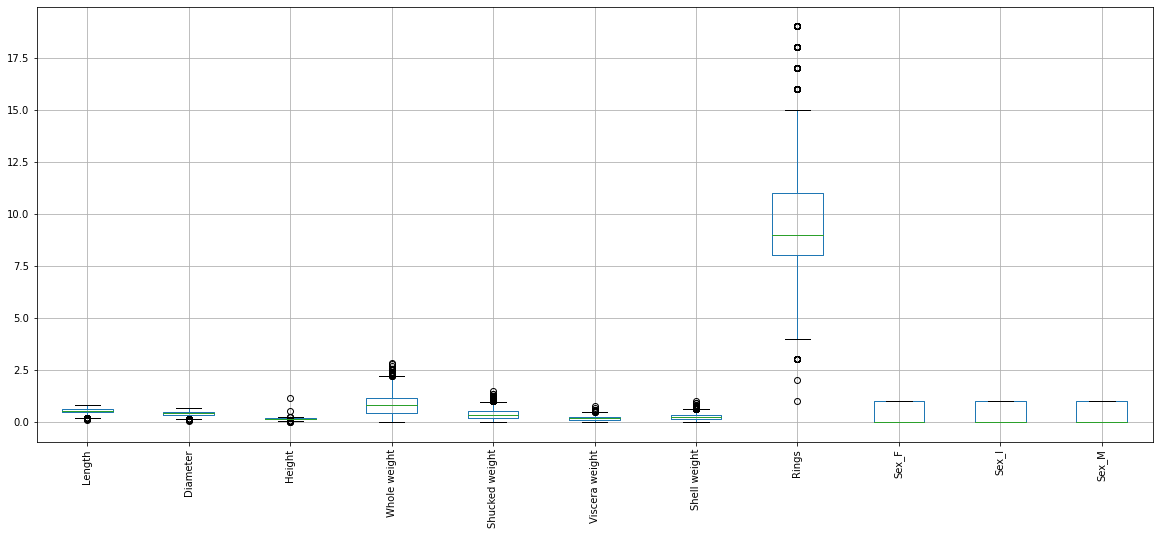

In [21]:
df.boxplot(rot = 90, figsize=(20,8))

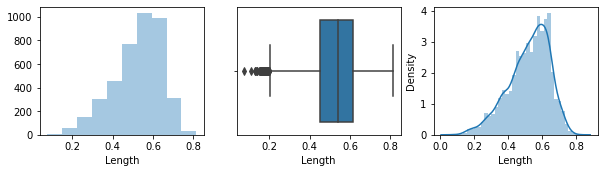

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.distplot(df['Length'], kde=False, bins=10);
plt.subplot(3,3,2)
sns.boxplot(df['Length']);
plt.subplot(3,3,3)
sns.distplot(df['Length']);


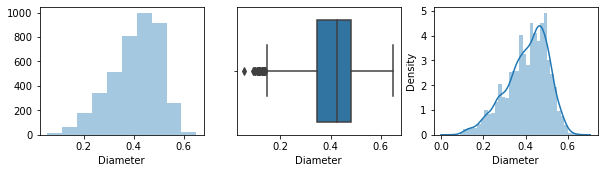

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,4)
sns.distplot(df['Diameter'], kde=False, bins=10);
plt.subplot(3,3,5)
sns.boxplot(df['Diameter']);
plt.subplot(3,3,6)
sns.distplot(df['Diameter']);

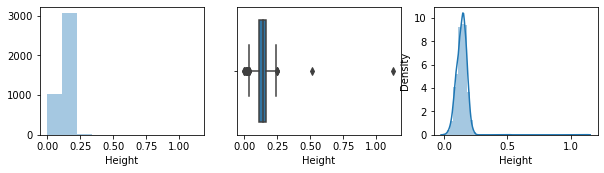

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,7)
sns.distplot(df['Height'], kde=False, bins=10);
plt.subplot(3,3,8)
sns.boxplot(df['Height']);
plt.subplot(3,3,9)
sns.distplot(df['Height']);

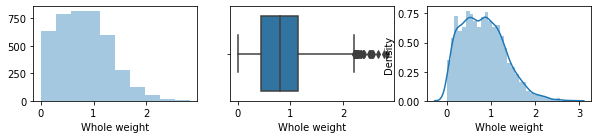

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(4,3,1)
sns.distplot(df['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(df['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(df['Whole weight']);


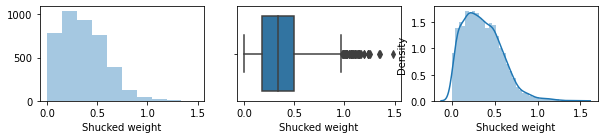

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(4,3,4)
sns.distplot(df['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(df['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(df['Shucked weight']);

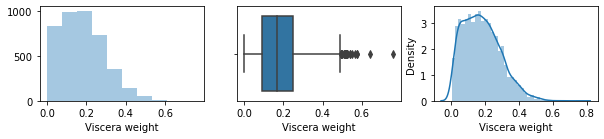

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(4,3,7)
sns.distplot(df['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(df['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(df['Viscera weight']);


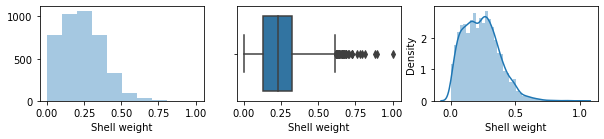

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(4,3,10)
sns.distplot(df['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(df['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(df['Shell weight']);


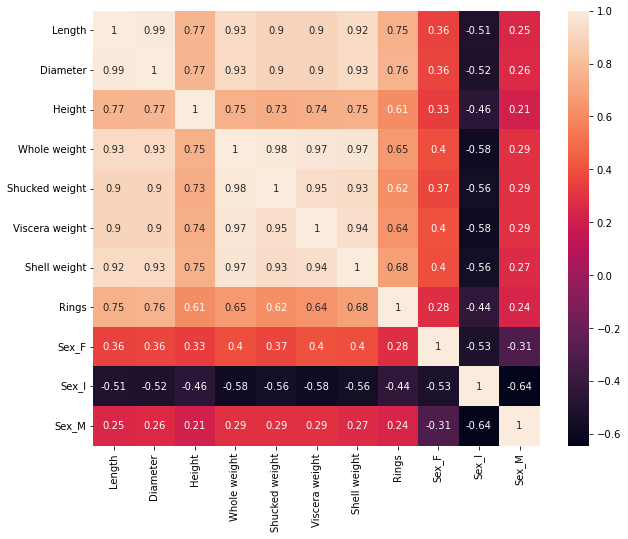

In [29]:
i_df = df[df['Rings'] < 10]

plt.figure(figsize=(10,8))
corr  =  i_df.corr()
sns.heatmap(corr, annot=True);

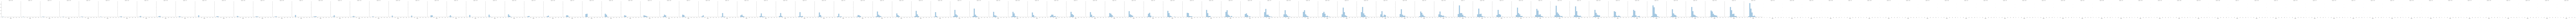

In [30]:
g = sns.FacetGrid(df, col='Length', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2));

In [31]:
g

In [32]:
plt.figure(figsize=(20,5))
sns.lmplot(data=df, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

KeyError: "['Sex'] not in index"

<Figure size 1440x360 with 0 Axes>

In [33]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [34]:
from scipy import stats
df_outlier = df.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.563206  0.420512  1.052261      0.630960        0.600139   
1     1.436561  1.428028  1.171988      1.221998        1.162156   
2     0.060619  0.133621  0.094443      0.297029        0.456263   
3     0.687971  0.420512  0.333898      0.626863        0.640604   
4     1.602914  1.528779  1.411443      1.263996        1.207117   
...        ...       ...       ...           ...             ...   
4172  0.351737  0.435876  0.623920      0.133189        0.054049   
4173  0.559679  0.335124  0.094443      0.295034        0.364282   
4174  0.642856  0.687755  1.581738      0.725252        0.753198   
4175  0.850797  0.788506  0.264738      0.558286        0.777926   
4176  1.557799  1.493767  1.342283      2.307841        2.641575   

      Viscera weight  Shell weight     Rings     Sex_F     Sex_I     Sex_M  
0           0.717545      0.627428  1.804875  0.670033  0.694513  1.319661  
1           1.197257      1.2

In [35]:
df_outlier=df_outlier[(z  <  3).all(axis=1)]
df.shape

(4115, 11)

In [36]:
threshold = 3
print(np.where(z  >  3))

(array([   8,   32,   79,  125,  126,  160,  161,  162,  162,  162,  163,
        165,  229,  229,  229,  229,  230,  230,  231,  231,  232,  249,
        268,  283,  300,  320,  342,  342,  348,  355,  407,  419,  457,
        471,  499,  553,  564,  612,  634,  642,  662,  662,  685,  685,
        686,  853,  853,  853, 1010, 1013, 1013, 1014, 1014, 1155, 1159,
       1161, 1164, 1166, 1168, 1168, 1169, 1169, 1169, 1169, 1171, 1171,
       1219, 1379, 1379, 1380, 1384, 1388, 1389, 1389, 1389, 1390, 1391,
       1391, 1490, 1716, 1718, 1719, 1721, 1723, 1724, 1724, 1724, 1725,
       1725, 1725, 1783, 1944, 1948, 1949, 2013, 2052, 2063, 2075, 2075,
       2118, 2121, 2122, 2159, 2165, 2230, 2232, 2302, 2316, 2318, 2331,
       2446, 2491, 2570, 2571, 2571, 2571, 2572, 2656, 2657, 2657, 2757,
       2757, 2758, 2758, 2758, 2809, 2810, 2810, 2810, 2954, 2955, 3094,
       3132, 3187, 3261, 3301, 3314, 3322, 3333, 3368, 3368, 3368, 3540,
       3540, 3569, 3654, 3656, 3656, 3656, 3656, 3

In [37]:
df_outlier.shape

(3995, 11)

In [38]:
x = df_outlier.drop('Rings', axis=1)
y = df_outlier.Rings

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr  =  RandomForestRegressor()

In [41]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
pred  =  rfr.predict(x_val)

In [43]:
from sklearn.metrics import mean_squared_error
print('RootMeanSquared Error is:  ', np.sqrt(mean_squared_error(y_val,pred)))

RootMeanSquared Error is:   1.950799925746336


In [44]:
test_data =  pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [45]:
from sklearn.preprocessing import LabelEncoder
le  =  LabelEncoder()
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [46]:
test_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [47]:
test_data_outlier= test_data.copy()
z = np.abs(stats.zscore(test_data_outlier))
print(z)

           Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.151980  0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.151980  1.448986  1.439929  1.183978      1.230277        1.170910   
2     1.280690  0.050033  0.122130  0.107991      0.309469        0.463500   
3     1.151980  0.699476  0.432149  0.347099      0.637819        0.648238   
4     0.064355  1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...       ...           ...             ...   
4172  1.280690  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  1.151980  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  1.151980  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  1.280690  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.151980  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.72

In [48]:
threshold  =  3
print(np.where(z>threshold))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [49]:
test_data_outlier.shape

(4177, 9)

In [50]:
test_data.shape

(4177, 9)

#         THANK YOU